*   Name: Dhvani Uday Parekh
*   AIML-B
*   Prn: 21070126126

In [1]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.1 MB/s eta 0:00:00


In [2]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-09-18 05:53:41.977763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv')

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df["title_text"] = df["title"] + df["text"]
df.head()

,title,text,label,title_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,NaN,Did they post their votes for Hillary already?,1,NaN
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [10]:
df.drop('title', axis=1,inplace=True)

In [11]:
df.drop('text',axis=1,inplace=True)

In [12]:
df.head()

,label,title_text
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,NaN
2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,1,SATAN 2: Russia unvelis an image of its terrif...


2) DO FOLLOWING Preprocessing STEPS using NLTK or SpaCy:
*  a) Remove empty rows. Remove duplicates.
*  b) Tokenization, Lemmatization
*  c) Data Cleansing: Remove stopwords, remove symbols,remove emojis,     remove URLS, remove http tags, remove excess whitespaces.
*  d) Lower the strings, replace abbreviations, fix contractions.



In [13]:
len(df)

72134

In [14]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [15]:
len(df)

63121

In [16]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [17]:
#Lowercase
def text_lower(text):
  text = None
  return text

In [18]:
#Remove Whitespace
def remove_whitespace(text):
  text = None
  return text

In [19]:
#Remove Punctuation
def remove_punctuation(text):
  punct = None
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [20]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = None
  return text

In [21]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = None
  return text

In [22]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [23]:
#Convert Contractions like you're
def convert_contractions(text):
  text = None
  return text

In [24]:
#Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [25]:
#Lemmatization

# Lemmatization
nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [26]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [27]:
# Cleaning of text data
def clean_text(text ):
    # remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove digits
    text1 = ''.join([w for w in text if not w.isdigit()])
    # lower case
    text2 = text1.lower()
    # remove escape characters
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')   #using regex library
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text2 = REPLACE_BY_SPACE_RE.sub('', text2)
    return text2

In [28]:
df['title_text'] = df['title_text'].apply(clean_text)

In [41]:
le = LabelEncoder()
df['Encoded_Labels'] = le.fit_transform(df['label'])
#label = data['Encoded_Labels'].unique()
inv_labels = le.inverse_transform([0,1]).tolist()
label_len = len(le.classes_)
df.head()

,label,title_text,Encoded_Labels
0,1,law enforcement on high alert following threat...,1
1,1,unbelievable obama’s attorney general says mos...,1
2,0,bobby jindal raised hindu uses story of christ...,0
3,1,satan russia unvelis an image of its terrifyi...,1
4,1,about time christian group sues amazon and spl...,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.title_text, df.Encoded_Labels, stratify=df.Encoded_Labels,random_state=2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

3) Use following as range of values for input variables, For 1st set of results use:
* a) batch_size = 4
* b) max_sequence_length = 50
* c) embedding_dim = 50
* d) max_words = 10000
* e) lstm_units = 32
* Apply single layer LSTM

In [31]:
batch_size = 4
max_words = 10000
max_len = 50
embedding_dim = 50
lstm_units = 32

In [32]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [33]:
seq_matrix[0]

array([   5,  143,  929,    3,    1,  472,   10,  118, 1420, 6158, 6556,
          9, 1515, 1639,  325,    4,  442, 3139, 1201,   11,    9,    5,
         52,  148,  211, 1403,    4, 3568,    1,  841, 1217,  569, 1130,
        402, 6556, 3139, 1130,   73,  673,   79,    8,  245,  673,   79,
          8,  517,   12,  761,   18,  671], dtype=int32)

In [34]:
 def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [35]:
model = LSTM_Model(max_words, max_len, embedding_dim, lstm_units, label_len)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 510690 (1.95 MB)
Trainable params: 510690 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train Model

In [37]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
9468/9468 [==============================] - 548s 57ms/step - loss: 0.2376 - accuracy: 0.9022 - val_loss: 0.1988 - val_accuracy: 0.9204
Epoch 2/3
9468/9468 [==============================] - 432s 46ms/step - loss: 0.1471 - accuracy: 0.9434 - val_loss: 0.2170 - val_accuracy: 0.9226
Epoch 3/3
9468/9468 [==============================] - 421s 44ms/step - loss: 0.1044 - accuracy: 0.9601 - val_loss: 0.2218 - val_accuracy: 0.9231


#Test Model

In [38]:
prediction = model.predict(test_seq_matrix)

494/494 [==============================] - 4s 8ms/step


5) Compare the results using Classification Report.

In [46]:
inv_labels = [str(label) for label in inv_labels]

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction, axis = 1),target_names=inv_labels))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8698
           1       0.93      0.90      0.91      7083

    accuracy                           0.92     15781
   macro avg       0.92      0.92      0.92     15781
weighted avg       0.92      0.92      0.92     15781



<Axes: >

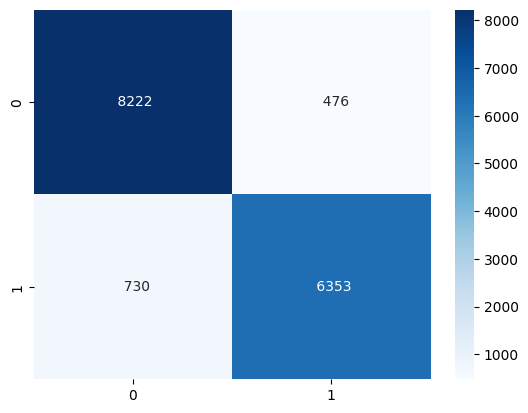

In [48]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction, axis = 1)), annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,yticklabels=inv_labels)

 For 2st set of results use:
* a) batch_size = 8
* b) max_sequence_length = 30
* c) embedding_dim = 30
* d) max_words = 25000
* e) lstm_units = 32
* Apply 2 Layer LSTM

In [49]:
batch_size = 8
max_words = 25000
max_len = 30
embedding_dim = 30
lstm_units = 32

In [50]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [51]:
def TwoLayerLSTM_Model(words, len, dim, units, num_labels):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # First LSTM layer with return_sequences=True
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))  # Second LSTM layer
    model.add(Dense(num_labels, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [52]:
model1 = TwoLayerLSTM_Model(max_words, max_len, embedding_dim, lstm_units, label_len)

In [53]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            750000    
                                                                 
 lstm_1 (LSTM)               (None, 30, 32)            8064      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 766450 (2.92 MB)
Trainable params: 766450 (2.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
4734/4734 [==============================] - 276s 57ms/step - loss: 0.2585 - accuracy: 0.8888 - val_loss: 0.2159 - val_accuracy: 0.9142
Epoch 2/3
4734/4734 [==============================] - 255s 54ms/step - loss: 0.1493 - accuracy: 0.9429 - val_loss: 0.2218 - val_accuracy: 0.9092
Epoch 3/3
3743/4734 [======================>.......] - ETA: 51s - loss: 0.0966 - accuracy: 0.9635

In [55]:
prediction1 = model1.predict(test_seq_matrix)

494/494 [==============================] - 12s 21ms/step


5) Compare the results using Classification Report.

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,np.argmax(prediction1, axis = 1),target_names=inv_labels))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8698
           1       0.90      0.90      0.90      7083

    accuracy                           0.91     15781
   macro avg       0.91      0.91      0.91     15781
weighted avg       0.91      0.91      0.91     15781



<Axes: >

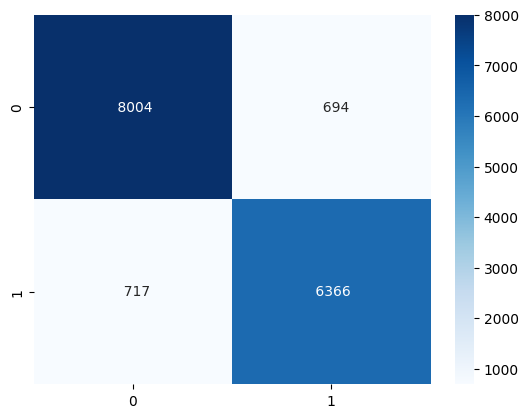

In [58]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction1, axis = 1)), annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,yticklabels=inv_labels)